In [7]:
from fastai.text import *

# Tokenizer Sentence Piece

In [8]:
import sentencepiece as spm
lang = "id"

In [10]:
sp = spm.SentencePieceProcessor()
sp.Load(f"{lang}_lm.model")

True

In [11]:
class LangTokenizer(BaseTokenizer):
    def __init__(self, lang: str, vocab_size: int = 60000):
        self.lang = lang
        self.vocab_size = vocab_size
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(f"{lang}_lm.model")
        self.vocab = Vocab([self.sp.IdToPiece(int(i)) for i in range(self.vocab_size)])

    def tokenizer(self, t: str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

    def detokenizer(self, t: List[str]) -> str:
        return self.sp.DecodePieces(t)

In [12]:
tokenizer = Tokenizer(tok_func=LangTokenizer, lang=lang)

In [13]:
lang = "id"
path_lm_csv = 'indo_18466.csv'
path_data_folder = "wiki"
german_tokenizer = Tokenizer(lang=lang)
data_lm = TextLMDataBunch.from_csv(path_data_folder,path_lm_csv, tokenizer = tokenizer)

In [14]:
data_lm.save("data_id_lm."+"pkl")

In [16]:
data_lm = load_data("wiki","data_id_lm."+"pkl")
print("wiki","data_id_lm."+"pkl")

wiki data_id_lm.pkl


In [17]:
data_lm.show_batch()

idx,text
0,"▁buatan ▁dapat ▁di f abrik asi ▁dengan ▁cukup ▁murah . ▁rubi ▁dianggap ▁merupakan ▁salah ▁satu ▁dari ▁empat ▁batu ▁berharga ▁bersama ▁dengan ▁sa fir , ▁ zam rud , ▁dan ▁intan . ▁harga ▁batu ▁rubi ▁terutama ▁ditentukan ▁oleh ▁warna . ▁warna ▁merah ▁paling ▁berkilau ▁dan ▁paling ▁bernilai ▁dapat ▁berharga ▁sangat ▁tinggi ▁melampaui ▁rubi ▁lain ▁dengan ▁mutu ▁yang ▁sama . ▁setelah ▁warna , ▁berikutnya ▁adalah ▁ke jernih an : ▁batu ▁yang ▁jernih"
1,"kai dō , ▁tō san dō , ▁dan ▁ho kuri ku dō ▁dikembalikan ▁ke ▁sistem ▁lama ▁yang ▁disebut ▁koku shi . ▁sebagai ▁penghormatan ▁terhadap ▁yoshinaka , ▁permintaan ▁tersebut ▁sedikit ▁di long gar kan ▁dengan ▁tidak ▁memasukkan ▁wilayah ▁ho kuri ku dō ▁yang ▁dimiliki ▁yoshinaka . ▁permintaan ▁tersebut ▁disetujui ▁dan ▁secara ▁"" de ▁facto "", ▁yoritomo ▁menjadi ▁penguasa ▁wilayah ▁sebelah ▁timur ▁jepang . ▁pada ▁tahun ▁11 84 , ▁yoritomo ▁mendirikan ▁lembaga"
2,"▁encer ▁ber bu ih . ▁dalam ▁tes ▁"" b low pi pe "", ▁mineral ▁ini ▁melebur ▁dengan ▁cepat , ▁yang ▁mengindikasikan ▁kandungan ▁timbal . ▁ xx bos ▁provinsi ▁maha jang a ▁provinsi ▁maha jang a ▁merupakan ▁sebuah ▁provinsi ▁di ▁madagaskar . ▁provinsi ▁ini ▁memiliki ▁luas ▁wilayah ▁15 0.0 23 ▁km 2. ▁dengan ▁memiliki ▁jumlah ▁penduduk ▁sebanyak ▁1. 73 3.9 17 ▁jiwa ▁(2001). ▁ibu ▁kotanya ▁ialah ▁maha jang a . ▁provinsi"
3,"▁cra b tree ▁“ a ▁de scription ▁of ▁satan ism ). ▁menurut ▁roald xxup ▁e ▁kristian sen ▁yang ▁menulis ▁tesis nya ▁tentang ▁setan isme , ▁menyatakan ▁bahwa ▁“ xxmaj set anisme ▁dapat ▁dianggap ▁sebagai ▁sebuah ▁agama ▁darwin istis ▁sosial ▁yang ▁berupaya ▁membela ▁hak - hak ▁golongan ▁terkuat ▁untuk ▁menguasai ▁yang ▁lemah , ▁karena ▁itulah ▁cara ▁manusia ▁untuk ▁maju ▁sebagai ▁sejenis ▁makhluk ▁biologis , ▁sehingga ▁tetap ▁memelihara ▁perannya ▁sebagai ▁ujung ▁tombak"
4,", ▁washington ▁post ▁dll . ▁ xx bos ▁pasir mu ncang , ▁pan ying kiran , ▁majalengka ▁pasir mu ncang ▁adalah ▁desa ▁di ▁kecamatan ▁pan ying kiran , ▁majalengka , ▁jawa ▁barat , ▁indonesia . ▁pasir mu ncang ▁adalah ▁sentral ▁mangga ▁gedong ▁gin cu . . . ▁by . ▁kaur ▁ek bang ( xxmaj af ip ▁roh endi , xxup ▁s . xxmaj sos ) ▁ xx bos ▁presiden ▁pro"


In [18]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

In [19]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,7.301987,7.165213,0.112137,05:26
1,6.350969,6.232868,0.170812,05:53
2,5.977445,5.887409,0.188097,05:57
3,5.762943,5.770086,0.194321,05:44
4,5.727080,5.752162,0.195434,05:30


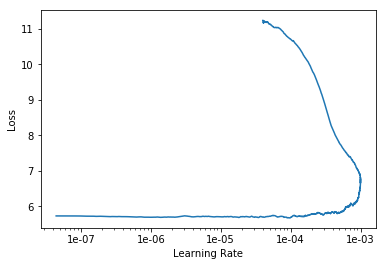

In [20]:
learn.recorder.plot(skip_end=12)

In [21]:
learn.save(f'{lang}-lm')